In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

plt.rcParams['figure.figsize'] = (12, 8)

%matplotlib inline

In [3]:
pd.options.display.max_rows = 20

In [4]:
! wc -l iowa-liquor.csv.gz

  432102 iowa-liquor.csv.gz


In [5]:
df = pd.read_csv("iowa-liquor.csv.gz", nrows=None, parse_dates=['DATE'], compression="gzip")

/Users/tom.augspurger/Envs/py3/lib/python3.4/site-packages/pandas-0.16.1_144_ga8b5798-py3.4-macosx-10.10-x86_64.egg/pandas/io/parsers.py:1170: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [9]:
df = df.sort('DATE')

In [15]:
df[df.DATE < pd.Timestamp('2014-07-01')].to_csv('liquor-small.csv', index=False)

In [12]:
df.DATE.dt.year.value_counts()

2014    2733404
2015     316509
dtype: int64

In [ ]:
df[df.DATE < pd.Timestamp('')]

In [52]:
s = df.ZIPCODE.head().iloc[0]

In [54]:
import re

In [57]:
re.match('\d{5}', str(s))

<_sre.SRE_Match object; span=(0, 5), match='50401'>

In [65]:
s = df.ZIPCODE.astype(str)

In [69]:
s.head().str.extract('(\d{5})')

0    50401
1    50401
2    50401
3    50401
4    50401
Name: ZIPCODE, dtype: object

In [2]:
df.dropna?

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
DATE                 100000 non-null datetime64[ns]
CONVENIENCE STORE    10575 non-null object
STORE                100000 non-null int64
NAME                 100000 non-null object
ADDRESS              100000 non-null object
CITY                 100000 non-null object
ZIPCODE              100000 non-null object
STORE LOCATION       100000 non-null object
COUNTY NUMBER        100000 non-null int64
COUNTY               100000 non-null object
CATEGORY             100000 non-null int64
CATEGORY NAME        100000 non-null object
VENDOR NO            100000 non-null int64
VENDOR               100000 non-null object
ITEM                 100000 non-null int64
DESCRIPTION          100000 non-null object
PACK                 100000 non-null int64
LITER SIZE           100000 non-null int64
STATE BTL COST       100000 non-null object
BTL PRICE            100000 non-null object
BOTTLE QTY

In [16]:
df['CONVENIENCE STORE'].unique()

array([nan, 'Y'], dtype=object)

In [18]:
df['CONVENIENCE STORE'] = df['CONVENIENCE STORE'] == 'Y'

In [212]:
df['store'] = pd.Categorical(df['NAME'], ordered=False)
# store_map =
df = df.drop(['STORE', 'NAME'], axis=1)

In [29]:
df['CITY'] = pd.Categorical(df['CITY'], ordered=False)

In [23]:
df.NAME.value_counts()

Hy-vee  #2 / Ames                       272
Hy-Vee Food Store #1 / Ames             248
Hy-Vee Food Store / Johnston            215
Hy-Vee Food Store #1 / Mason City       210
Hy-Vee Food and Drug / Clinton          209
Central City 2                          194
Hy-Vee Food Store / Fleur / DSM         192
Hy-Vee #3 / BDI / Des Moines            171
Hy-Vee / Urbandale                      167
Pit Stop Liquors / Newton               165
                                       ... 
Tequila's Liquor Store                   10
Kum & Go #208 / SE 14th DM               10
Monroe Liquor                             9
Casey's General Store #1705 / Lake M      8
Wal-Mart 0841 / Tipton                    8
The Secret Cellar                         7
Casey's General Store #3026 / St Cha      5
Mississippi River Distillery              3
Wine and Spirits Gallery                  1
Hy-Vee Food Store / Muscatine             1
dtype: int64

In [35]:
s = df['STORE LOCATION'].iloc[0]

In [36]:
s

'2400 4TH ST SW\nMASON CITY 50401\n(43.148463097000047, -93.236272961999987)'

In [75]:
df[['lat', 'lng']] = df['STORE LOCATION'].str.extract(regex).astype(float)
df.head()

,DATE,CONVENIENCE STORE,ADDRESS,CITY,ZIPCODE,STORE LOCATION,COUNTY NUMBER,COUNTY,CATEGORY,CATEGORY NAME,...,DESCRIPTION,PACK,LITER SIZE,STATE BTL COST,BTL PRICE,BOTTLE QTY,TOTAL,store,lat,lng
0,2015-02-26,False,2400 4TH ST SW,MASON CITY,50401,2400 4TH ST SW\nMASON CITY 50401\n(43.14846309...,17,Cerro Gordo,1022100,TEQUILA,...,Juarez Tequila Silver,12,1000,$6.92,$10.38,48,$498.24,Hy-Vee Food Store #1 / Mason City,43.148463,-93.236273
1,2015-02-26,False,2400 4TH ST SW,MASON CITY,50401,2400 4TH ST SW\nMASON CITY 50401\n(43.14846309...,17,Cerro Gordo,1022100,TEQUILA,...,Juarez Tequila Silver,6,1750,$13.50,$20.25,6,$121.50,Hy-Vee Food Store #1 / Mason City,43.148463,-93.236273
2,2015-02-26,False,2400 4TH ST SW,MASON CITY,50401,2400 4TH ST SW\nMASON CITY 50401\n(43.14846309...,17,Cerro Gordo,1012200,SCOTCH WHISKIES,...,Lauder's,24,375,$3.21,$4.82,3,$14.46,Hy-Vee Food Store #1 / Mason City,43.148463,-93.236273
3,2015-02-26,False,2400 4TH ST SW,MASON CITY,50401,2400 4TH ST SW\nMASON CITY 50401\n(43.14846309...,17,Cerro Gordo,1022100,TEQUILA,...,Patron Silver Tequila,12,375,$14.00,$21.00,2,$42.00,Hy-Vee Food Store #1 / Mason City,43.148463,-93.236273
4,2015-02-26,False,2400 4TH ST SW,MASON CITY,50401,2400 4TH ST SW\nMASON CITY 50401\n(43.14846309...,17,Cerro Gordo,1022100,TEQUILA,...,Tortilla White Tequila,12,1000,$6.64,$9.96,24,$239.04,Hy-Vee Food Store #1 / Mason City,43.148463,-93.236273


In [79]:
df['COUNTY'] = pd.Categorical(df.COUNTY, ordered=False)
df = df.drop(['COUNTY', 'COUNTY NUMBER'], axis=1)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 21 columns):
DATE                 10000 non-null datetime64[ns]
CONVENIENCE STORE    10000 non-null bool
ADDRESS              10000 non-null object
CITY                 10000 non-null category
ZIPCODE              10000 non-null int64
STORE LOCATION       10000 non-null object
CATEGORY             10000 non-null int64
CATEGORY NAME        10000 non-null object
VENDOR NO            10000 non-null int64
VENDOR               10000 non-null object
ITEM                 10000 non-null int64
DESCRIPTION          10000 non-null object
PACK                 10000 non-null int64
LITER SIZE           10000 non-null int64
STATE BTL COST       10000 non-null object
BTL PRICE            10000 non-null object
BOTTLE QTY           10000 non-null int64
TOTAL                10000 non-null object
store                10000 non-null category
lat                  10000 non-null float64
lng                  10000 n

In [83]:
df['CATEGORY NAME'].value_counts()

80 PROOF VODKA                      1321
CANADIAN WHISKIES                    924
STRAIGHT BOURBON WHISKIES            550
FLAVORED VODKA                       504
SPICED RUM                           501
TEQUILA                              486
BLENDED WHISKIES                     426
IMPORTED VODKA                       418
WHISKEY LIQUEUR                      377
PUERTO RICO & VIRGIN ISLANDS RUM     344
                                    ... 
DARK CREME DE CACAO                    8
BOTTLED IN BOND BOURBON                7
WHITE CREME DE MENTHE                  6
ROCK & RYE                             3
ANISETTE                               2
SPEARMINT SCHNAPPS                     2
MISCELLANEOUS BRANDIES                 2
LOW PROOF VODKA                        2
OTHER PROOF VODKA                      2
CREME DE ALMOND                        1
dtype: int64

In [84]:
df['CATEGORY'] = pd.Categorical(df['CATEGORY'], ordered=False)

In [86]:
df = df.drop(['CATEGORY', 'CATEGORY NAME'], axis=1)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 19 columns):
DATE                 10000 non-null datetime64[ns]
CONVENIENCE STORE    10000 non-null bool
ADDRESS              10000 non-null object
CITY                 10000 non-null category
ZIPCODE              10000 non-null int64
STORE LOCATION       10000 non-null object
VENDOR NO            10000 non-null int64
VENDOR               10000 non-null object
ITEM                 10000 non-null int64
DESCRIPTION          10000 non-null object
PACK                 10000 non-null int64
LITER SIZE           10000 non-null int64
STATE BTL COST       10000 non-null object
BTL PRICE            10000 non-null object
BOTTLE QTY           10000 non-null int64
TOTAL                10000 non-null object
store                10000 non-null category
lat                  10000 non-null float64
lng                  10000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](1), float64(2), int64(6)

In [91]:
df['VENDOR'] = pd.Categorical(df.VENDOR, ordered=False)
df = df.drop(['VENDOR', 'VENDOR NO'], axis=1)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
DATE                 10000 non-null datetime64[ns]
CONVENIENCE STORE    10000 non-null bool
ADDRESS              10000 non-null object
CITY                 10000 non-null category
ZIPCODE              10000 non-null int64
STORE LOCATION       10000 non-null object
ITEM                 10000 non-null int64
DESCRIPTION          10000 non-null object
PACK                 10000 non-null int64
LITER SIZE           10000 non-null int64
STATE BTL COST       10000 non-null object
BTL PRICE            10000 non-null object
BOTTLE QTY           10000 non-null int64
TOTAL                10000 non-null object
store                10000 non-null category
lat                  10000 non-null float64
lng                  10000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 1.2+ MB


In [96]:
df[['ITEM', 'DESCRIPTION']].drop_duplicates()

,ITEM,DESCRIPTION
0,87937,Juarez Tequila Silver
1,87938,Juarez Tequila Silver
2,8824,Lauder's
3,88294,Patron Silver Tequila
4,88767,Tortilla White Tequila
5,89175,Don Julio Anejo Tequila
6,89182,El Mayor Reposado
7,89197,Jose Cuervo Especial Reposado Tequila
8,89198,Jose Cuervo Especial Reposado Tequila
9,89199,Jose Cuervo Especial Reposado Square


In [101]:
df.DESCRIPTION.nunique()

1095

In [102]:
# TODO: n_items > n_description
# item -> desc is probalby unique, but some desc -> mulitple items.
df.ITEM.nunique() == df.DESCRIPTION.nunique() #== df[['ITEM', 'DESCRIPTION']].drop_duplicates().shape[0]

False

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
DATE                 10000 non-null datetime64[ns]
CONVENIENCE STORE    10000 non-null bool
ADDRESS              10000 non-null object
CITY                 10000 non-null category
ZIPCODE              10000 non-null int64
STORE LOCATION       10000 non-null object
ITEM                 10000 non-null int64
DESCRIPTION          10000 non-null object
PACK                 10000 non-null int64
LITER SIZE           10000 non-null int64
STATE BTL COST       10000 non-null object
BTL PRICE            10000 non-null object
BOTTLE QTY           10000 non-null int64
TOTAL                10000 non-null object
store                10000 non-null category
lat                  10000 non-null float64
lng                  10000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 1.2+ MB


In [121]:
sns.set_style("dark")

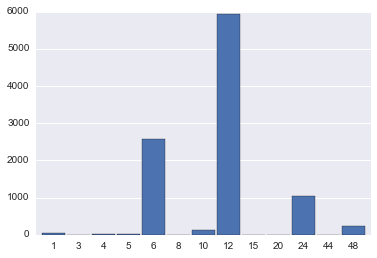

In [122]:
ax = df.PACK.value_counts().sort_index().plot(kind='bar', width=.9, rot=0)
ax.grid(axis='y')

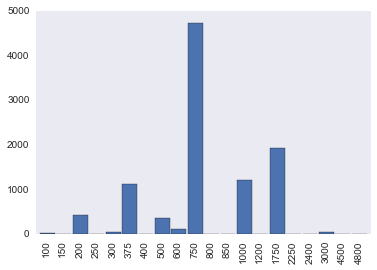

In [125]:
df['LITER SIZE'].value_counts().sort_index().plot(kind='bar', width=.9)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
DATE                 10000 non-null datetime64[ns]
CONVENIENCE STORE    10000 non-null bool
ADDRESS              10000 non-null object
CITY                 10000 non-null category
ZIPCODE              10000 non-null int64
STORE LOCATION       10000 non-null object
ITEM                 10000 non-null int64
DESCRIPTION          10000 non-null object
PACK                 10000 non-null int64
LITER SIZE           10000 non-null int64
STATE BTL COST       10000 non-null object
BTL PRICE            10000 non-null object
BOTTLE QTY           10000 non-null int64
TOTAL                10000 non-null object
store                10000 non-null category
lat                  10000 non-null float64
lng                  10000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 1.2+ MB


In [132]:
df['STATE BTL COST'] = df['STATE BTL COST'].str.strip('$').astype(float)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
DATE                 10000 non-null datetime64[ns]
CONVENIENCE STORE    10000 non-null bool
ADDRESS              10000 non-null object
CITY                 10000 non-null category
ZIPCODE              10000 non-null int64
STORE LOCATION       10000 non-null object
ITEM                 10000 non-null int64
DESCRIPTION          10000 non-null object
PACK                 10000 non-null int64
LITER SIZE           10000 non-null int64
STATE BTL COST       10000 non-null float64
BTL PRICE            10000 non-null object
BOTTLE QTY           10000 non-null int64
TOTAL                10000 non-null object
store                10000 non-null category
lat                  10000 non-null float64
lng                  10000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 1.2+ MB


In [136]:
df['BTL PRICE'] = df['BTL PRICE'].str.strip('$').astype(float)

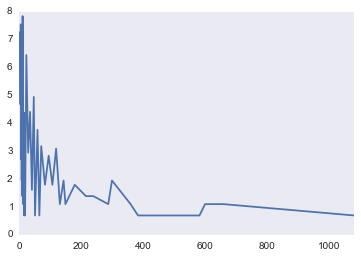

In [142]:
np.log(1 + df['BOTTLE QTY'].value_counts().sort_index()).plot()

In [147]:
df['TOTAL'] = df['TOTAL'].str.strip('$').astype(float)

In [5]:
from functools import wraps

In [6]:
def log_shape(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        df = args[0]
        print(func.__name__, "input ", df.shape)
        result = func(*args, **kwargs)
        print(" " * len(func.__name__), "output", result.shape)
        return result
    return wrapper

def count_null(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        df = args[0]
        print(func.__name__, "missing", df.isnull().sum().sum())
        result = func(*args, **kwargs)
        print(" " * len(func.__name__), "output", result.isnull().sum().sum())
        return result
    return wrapper

def no_missing(func):
    @wraps(func)
    def wrapper(*args, **kwarsg):
        df = args[0]
        assert df.isnull().sum().sum() == 0
        result = func(*args, **kwargs)
        return results
    return wrapper

In [72]:
# @log_shape
# @count_null
def is_convenience(df):
    df['is_convenience'] = df['CONVENIENCE STORE'] == 'Y'
    df = df.drop('CONVENIENCE STORE', axis=1)
    return df

def as_categorical(df, columns):
    for col in columns:
        df[col] = df[col].astype('category')
    return df

def drop_unused(df, columns):
    return df.drop(columns, axis=1)

def extract_latlng(df):
    import re
    regex = re.compile(r"\((?P<lat>\-?\d+\.\d+?),\s*(?P<lng>\-?\d+\.\d+?)\)$")
    df[['lat', 'lng']] = df['STORE LOCATION'].str.extract(regex).astype(float)
    return df

def strip_dollar(df, columns):
    df[columns] = df[columns].apply(lambda s: s.str.strip('$').astype(float))
    return df

def clean_zip(df):
    df['ZIPCODE'] = df.ZIPCODE.astype(str)
    df['ZIPCODE'] = df.ZIPCODE.str.extract(r'(\d{5})')
    return df

In [8]:
dollar_cols = ['BTL PRICE', 'TOTAL']
cats = ['NAME', 'CITY', 'COUNTY', 'CATEGORY NAME', 'VENDOR', 'DESCRIPTION', 'ZIPCODE']
clean = ['STORE', 'COUNTY NUMBER', 'CATEGORY', 'VENDOR NO']

In [75]:
def prep(fp, nrows=10000):
    df = pd.read_csv(fp, nrows=nrows, parse_dates=['DATE'])
    df = clean_zip(df)
    df = is_convenience(df)
    df = as_categorical(df, columns=cats)
    df = extract_latlng(df)
    df = strip_dollar(df, dollar_cols)
    df = drop_unused(df, clean)
    return df

In [76]:
def pipe(self, func, *args, **kwargs):
    pipe_func = getattr(func, '__pipe_func__', func)
    return pipe_func(self, *args, **kwargs)

pd.DataFrame.pipe = pipe

In [77]:
def prep_pipey(fp, nrows=10000):
    df = (pd.read_csv(fp, nrows=nrows, parse_dates=['DATE'], compression='gzip')
            .pipe(clean_zip)
            .pipe(is_convenience)
            .pipe(as_categorical, columns=cats)
            .pipe(extract_latlng)
            .pipe(strip_dollar, columns=dollar_cols)
            .pipe(drop_unused, clean)
          )
    return df


In [78]:
%%time
df = prep_pipey('iowa-liquor.csv.gz', nrows=None)

CPU times: user 3min 31s, sys: 7.96 s, total: 3min 39s
Wall time: 3min 42s


/Users/tom.augspurger/Envs/py3/lib/python3.4/site-packages/pandas-0.16.1_119_g342c91b-py3.4-macosx-10.10-x86_64.egg/pandas/io/parsers.py:1170: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [80]:
df = df.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [81]:
store = pd.HDFStore("store.h5")
print(store)
store.close()

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5
/cleaned                                     [invalid_HDFStore node: object of type 'NoneType' has no len()]                   
/cleaned                                     series_table (typ->appendable,nrows->1939,ncols->1,indexers->[index],dc->[values])
/cleaned/meta/values_block_0/meta            series_table (typ->appendable,nrows->381,ncols->1,indexers->[index],dc->[values]) 
/cleaned/meta/values_block_1/meta            series_table (typ->legacy,nrows->None,ncols->0,indexers->[])                      
/cleaned/meta/values_block_2/meta                                                                                              


In [82]:
with pd.HDFStore("store.h5") as store:
    store.remove("cleaned")
    print(store)

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5
Empty


In [83]:
%%time
# df = prep_pipey('iowa-liquor.csv', nrows=None)
df.to_hdf("store.h5", "cleaned", format='table')

CPU times: user 7.53 s, sys: 2.62 s, total: 10.2 s
Wall time: 11.2 s


In [88]:
%matplotlib inline

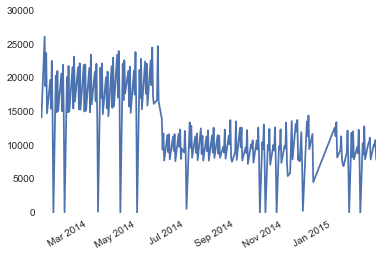

In [89]:
df.date.value_counts().sort_index().plot()

# Analysis

In [3]:
df = pd.read_hdf('store.h5', 'cleaned')

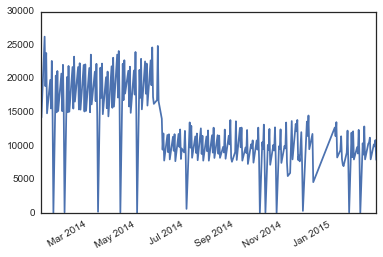

In [5]:
df['date'].value_counts().order().plot()

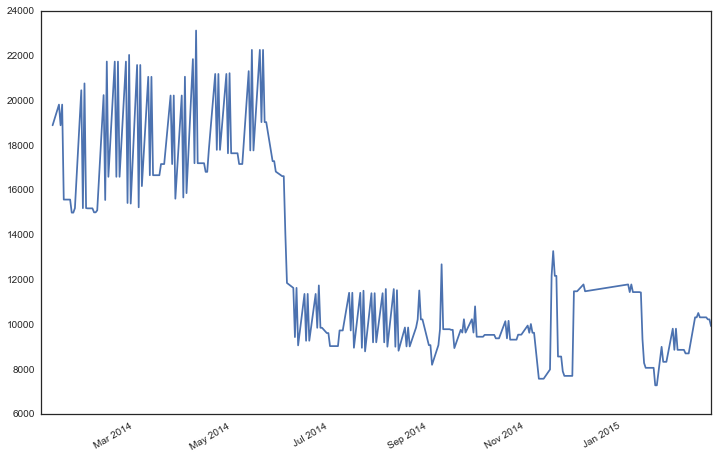

In [43]:
ts = df.date.value_counts().sort_index()
pd.rolling_median(ts, 5).plot()

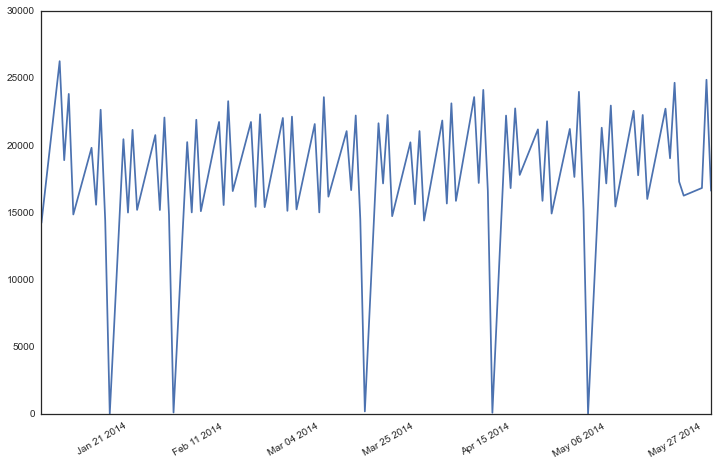

In [48]:
ts.loc[:'2014-05'].plot()

In [57]:
sub = df[df.date < pd.Timestamp('2014-06-01')]

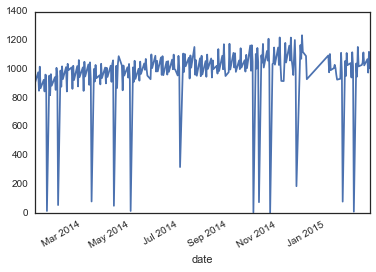

In [12]:
# Has the number of unique items increased?
df.groupby('date').description.nunique().plot()

In [6]:
import statsmodels.api as sm

In [7]:
x = df.groupby('date').description.nunique()
x = x.resample('W', how='sum').fillna(method='ffill')

In [9]:
r = sm.tsa.seasonal_decompose(x)

NonGuiException: 

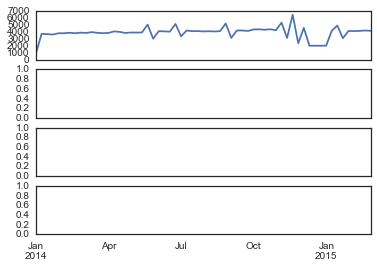

In [11]:
r.plot()

In [103]:
df.groupby(df.date.dt.dayofweek).total.count()

0    811471
1    675970
2    897104
3    602358
4     55303
5      7707
Name: total, dtype: int64

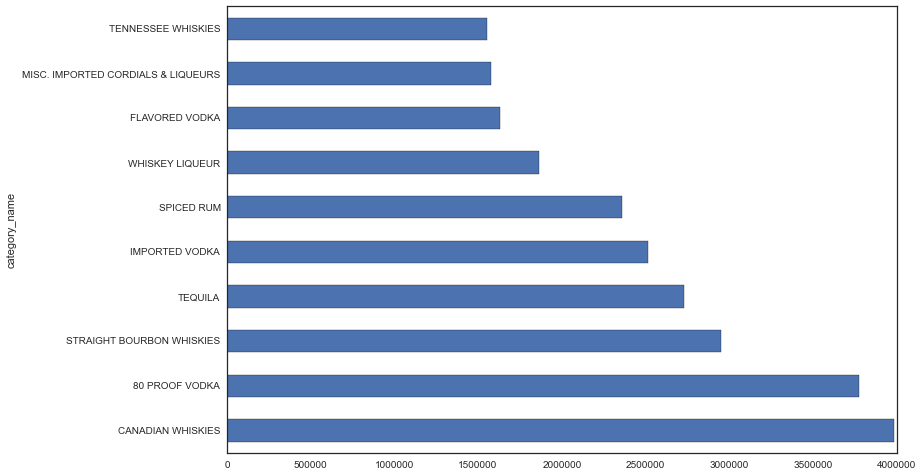

In [32]:
df.groupby('category_name').btl_price.sum().order(ascending=False).head(10).plot(kind='barh')

In [82]:
sub.

,date,name,address,city,zipcode,store_location,county,category_name,vendor,item,description,pack,liter_size,state_btl_cost,btl_price,bottle_qty,total,is_convenience,lat,lng
1434297,2014-05-29,Walgreens #07453 / Des Moines,104 E EUCLID AVE,DES MOINES,50313,104 E EUCLID AVE\nDES MOINES 50313\n(41.627727...,Polk,PUERTO RICO & VIRGIN ISLANDS RUM,Luxco-St Louis,45278,Paramount White Rum,6,1750,$7.84,11.76,6,70.56,False,41.627728,-93.617180
1434298,2014-05-29,U S Gas,3000 SW 9th ST,DES MOINES,50315,3000 SW 9th ST\nDES MOINES 50315\n(41.55787854...,Polk,IMPORTED VODKA,Moet Hennessy USA Inc.,34155,Belvedere Vodka,6,750,$17.15,25.73,2,51.46,True,41.557879,-93.625737
1434299,2014-05-29,Smokin' Joe's #11 Tobacco and Liquor,1606 CAMANCHE AVE,CLINTON,52732,1606 CAMANCHE AVE\nCLINTON 52732\n(41.82829173...,Clinton,AMERICAN GRAPE BRANDIES,Heaven Hill Distilleries Inc.,52316,Christian Bros Brandy,12,750,$5.92,8.88,1,8.88,False,41.828292,-90.204119
1434300,2014-05-29,Sycamore Convenience,617 SYCAMORE,WATERLOO,50703,617 SYCAMORE\nWATERLOO 50703\n(42.497833997000...,Black Hawk,FLAVORED RUM,Jim Beam Brands,44419,Cruzan Black Cherry Rum,12,750,$6.83,10.25,2,20.50,False,42.497834,-92.335315
1434301,2014-05-29,Walgreens #07453 / Des Moines,104 E EUCLID AVE,DES MOINES,50313,104 E EUCLID AVE\nDES MOINES 50313\n(41.627727...,Polk,PUERTO RICO & VIRGIN ISLANDS RUM,Bacardi U.S.A. Inc.,43126,Bacardi Superior Rum,12,750,$8.00,12.00,12,144.00,False,41.627728,-93.617180
1434302,2014-05-29,Central City Liquor Inc.,1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,Polk,SINGLE MALT SCOTCH,Moet Hennessy USA Inc.,5103,Glenmorangie Lasanta,6,750,$27.99,41.99,6,251.94,False,41.605570,-93.619827
1434303,2014-05-29,Smokin' Joe's #11 Tobacco and Liquor,1606 CAMANCHE AVE,CLINTON,52732,1606 CAMANCHE AVE\nCLINTON 52732\n(41.82829173...,Clinton,AMERICAN GRAPE BRANDIES,Heaven Hill Distilleries Inc.,52314,Christian Bros Brandy,24,375,$3.23,4.85,1,4.85,False,41.828292,-90.204119
1434304,2014-05-29,Central City Liquor Inc.,1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,Polk,STRAIGHT RYE WHISKIES,Wilson Daniels Ltd.,27102,Templeton Rye,6,750,$18.09,27.14,6,162.84,False,41.605570,-93.619827
1434305,2014-05-29,0753 Wal-mart / Cedar Fall,525 BRANDILYNN BLVD,CEDAR FALLS,50613,525 BRANDILYNN BLVD\nCEDAR FALLS 50613\n(42.48...,Black Hawk,IMPORTED VODKA,Jim Beam Brands,34578,Pinnacle Vodka,6,1750,$12.08,18.12,6,108.72,False,42.485056,-92.441150
1434306,2014-05-29,Central City Liquor Inc.,1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,Polk,CANADIAN WHISKIES,Diageo Americas,11290,Crown Royal Canadian Whisky Mini,10,300,$6.90,10.35,1,10.35,False,41.605570,-93.619827
